# Group 20 Project Checkpoint#

## Examine factors impacting the price of used cars for sale##

### Rachel Emerson, Nabil Jarachi, Willam Smith ###

The objective of our project is to examine significant factors that impact the price of used cars for sale. To accomplish this, we will create a linear regression model to predict the price of vehicles for sale in the state of Iowa. We obtained this data in CSV format from Kaggle. Included within the data are entries for all used vehicles within the United States which were uploaded to Craigslist.  

After reviewing the data, we have determined which variables to consider in our model. These include price, year, manufacturer, color, and condition (title status, transmission, size). To determine what values to use, we utilized various statistical methods with NumPy and Pandas. After reading the data into a Pandas dataframe, we relied on methods such as info, value_counts, describe, mean, max, and min to determine what was feasible.  

Our current progress can be viewed in the attached Jupyter Notebook file. As we progress in our analysis, we plan to add visualizations to extract additional value from the data. Upon completion, we strive to have a usable application that can be relied upon to determine the price of a customer’s next used car purchase. 

In [6]:
#import libraries
import pandas as pd
import os

In [7]:
#Change directory
os.chdir('E:\\OneDrive - University of Iowa\\MBA Courses\\Data Programming in Python summer 2020\\Group Project\\data')

In [8]:
#read the file into a pandas dataframe
df=pd.read_csv("vehicles.csv")

In [9]:
# examining the top 5 rows
df[:5]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [10]:
#Examining the number of observations in the dataframe
len(df)

539759

In [11]:
#Displaying information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [18]:
#Inital subsetting the dataframe
df1=df[['id','price','year','manufacturer','condition','cylinders','fuel',
       'odometer','title_status','transmission','drive','size','type','paint_color','state']]

In [19]:
# examining the top 5 rows
df1[:5]

,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,7088746062,10299,2012.0,acura,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc
1,7088745301,0,2011.0,bmw,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,nc
2,7088744126,9500,2011.0,jaguar,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc
3,7088743681,3995,2004.0,honda,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc
4,7074612539,41988,2016.0,chevrolet,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ne


In [16]:
#Summary of numeric variables
df1.describe()

,id,price,year,odometer
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07


In [20]:
#Summary of character variables
df1.describe(include='object')

,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,516175,303707,321264,536366,536819,535786,383987,168550,392290,365520,539759
unique,43,6,8,5,6,3,3,4,13,12,51
top,ford,excellent,6 cylinders,gas,clean,automatic,4wd,full-size,sedan,white,ca
freq,98858,142619,116713,469078,513925,475946,178592,92545,96119,95528,55178


In [21]:
#write the subset data into a new csv file
df1.to_csv('vehicles_v1.csv')

In [22]:
#Reading in the new file
df1=pd.read_csv('vehicles_v1.csv')

In [24]:
# examining the top 5 rows
df1[:5]

,Unnamed: 0,id,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,0,7088746062,10299,2012.0,acura,NaN,NaN,gas,90186.0,clean,automatic,NaN,NaN,other,blue,nc
1,1,7088745301,0,2011.0,bmw,NaN,6 cylinders,gas,115120.0,clean,automatic,rwd,NaN,convertible,blue,nc
2,2,7088744126,9500,2011.0,jaguar,excellent,NaN,gas,85000.0,clean,automatic,NaN,NaN,NaN,blue,nc
3,3,7088743681,3995,2004.0,honda,NaN,NaN,gas,212526.0,clean,automatic,fwd,NaN,SUV,orange,nc
4,4,7074612539,41988,2016.0,chevrolet,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ne


In [ ]:

#import matplotlib.pyplot as plt
#df1.plot(kind='bar',x='manufacturer')

In [25]:
#subsetting the dataframe based on price, condition, State and year
df2=df1[(df1.price > 0) & (df1.condition.notnull()) & (df1.state == "ia")  & (df1.year >= 1990)] 

In [28]:
#Checking year, condition, fuel counts – quick exploration of the data 
x1=df2.year.value_counts(ascending=False) 
x2=df2.condition.value_counts(ascending=False) 
x3=df2.fuel.value_counts(ascending=False) 
x1,x2,x3

(2015.0    513
 2013.0    497
 2012.0    471
 2008.0    458
 2014.0    431
 2017.0    420
 2007.0    397
 2016.0    393
 2011.0    383
 2009.0    314
 2010.0    310
 2006.0    307
 2005.0    253
 2018.0    242
 2004.0    228
 2019.0    180
 2003.0    141
 2002.0    126
 2001.0    114
 1999.0     63
 2000.0     59
 1998.0     48
 1997.0     40
 2020.0     39
 1996.0     23
 1995.0     18
 1993.0     16
 1994.0     15
 1990.0     13
 1992.0      8
 1991.0      6
 Name: year, dtype: int64,
 excellent    3408
 good         2494
 like new      431
 fair          162
 new            22
 salvage         9
 Name: condition, dtype: int64,
 gas         6031
 diesel       315
 other        134
 hybrid        45
 electric       1
 Name: fuel, dtype: int64)

In [33]:
#replace “like new” with “new” as to not confuse those categories 
df2.replace("like new", "new", inplace=True) 

In [35]:
#create indicator variables for some categories to explore
#Note: Still need to work through this error

import numpy as np

df2['excellent'] = np.where(df2.condition == 'excellent', "1", "0") 
df2['new'] = np.where(df2.condition == 'new', "1", "0") 
df2['fair'] = np.where(df2.condition == 'fair', "1", "0") 
df2['good'] = np.where(df2.title_status == 'good', "1", "0") 
df2['cleantitle'] = np.where(df2.title_status == 'clean', "1", "0") 
df2['automatic'] = np.where(df2.transmission == 'automatic', "1", "0") 
df2['AWD'] = np.where(df2.drive == '4wd', "1", "0") 
df2['full_size'] = np.where(df2.size == 'full-size', "1", "0") 
df2['gas'] = np.where(df2.fuel == 'gas', "1", "0") 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

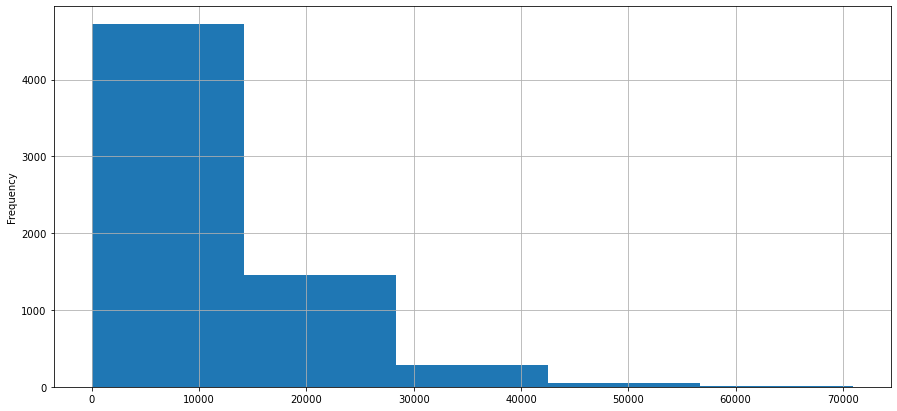

In [21]:
#histogram of price 

df2.price.plot(kind="hist", bins=5, grid=True, figsize=(15,7)) 

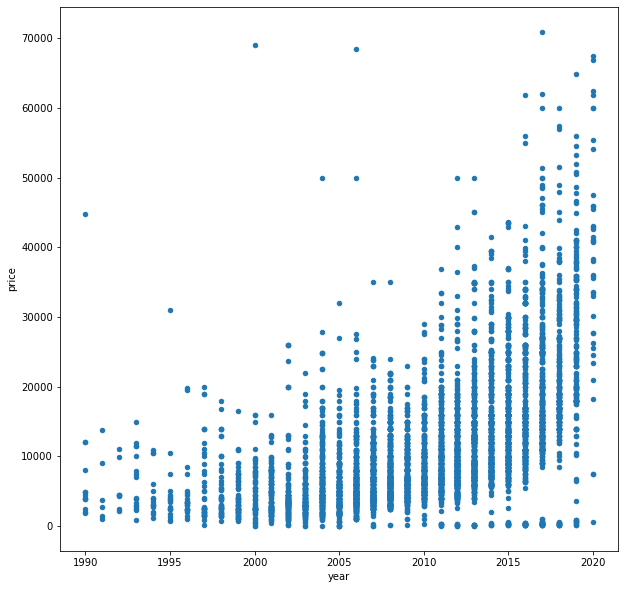

In [22]:
#scatterplot of year and price 

df2.plot(kind='scatter', x='year', y='price', figsize=(10,10)) 

In [23]:
#correlation matrix with price, odometer, and year 
df2[["price","odometer","year"]].corr() 

,price,odometer,year
price,1.000000,-0.350173,0.539579
odometer,-0.350173,1.000000,-0.441913
year,0.539579,-0.441913,1.000000
